## Problem Set 3: Data Structures and Algorithms
### 22/04/2024
### Aditya Narayan Rai - 235843

**Question 1:** Write a function which uses numpy to multiply two matrices together. This isn't a trick question: it should just be a one line function.

**Solution:**

In [1]:
# Let's import all the packages we are going to use 
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

In [2]:
# Let's define the multiplication function
def multiply_matrices(A, B):
    return np.dot(A, B)

**Question 2:** Write a function to do matrix multiplication for a 2 x 2 matrix. You can implement this to use the "grade school" algorithm. That is, to find  $ C = AB $, just directly write out math for $ C_{ij} = A_{i1} B_{1j} + A_{i2} B_{2j} $. (This is just a direct application of the definition of matrix multiplication.)

**Solution:**

In [3]:
def matrix_multiply_2_2(A, B):
    # Let's initialize the resulting matrix C
    C = [[0, 0],
         [0, 0]]
    
    # And then, compute each element of the resulting matrix C
    for i in range(2):
        for j in range(2):
            C[i][j] = A[i][0] * B[0][j] + A[i][1] * B[1][j]
    
    return C

**Example Usage of the above Function:**

In [4]:
# Let's define two matrices
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

# Let's use the function
result = matrix_multiply_2_2(A, B)

# And, print the resulting matrix
print("Result of matrix multiplication:")
for row in result:
    print(row)

Result of matrix multiplication:
[19, 22]
[43, 50]


**Question 3:** Write a function implementing Strassen's algorithm to multiply two matrices together. This was written in pseudo-code on page 48 of Lecture 8. You shouldn't ever have to calculate a matrix product using numpy (but feel free to add and subtract matrices using standard numpy syntax). The base case is the fucntion you wrote for the previous question. Your implementation should have the following elements:

- It should throw an exception if any dimension of the matrix is not a power of two, if either matrix is not square, and if they are not compatible sizes.
- A base case (when n = 2) that just performs a simple matrix multiplication using your function from question (2).
- Division of the problem into seven different sub-problems, each of which is a matrix multiplication, defined as we did in class. These will require recursive calls of function!
- Combination of the sub-problem solutions together into a solution for the full problem.

**Solution:**

In [5]:
def matrix_multiply_2_2(A, B):
    # Let's initialize the resulting matrix C
    C = [[0, 0],
         [0, 0]]
    
    # Compute each element of the resulting matrix C
    for i in range(2):
        for j in range(2):
            C[i][j] = A[i][0] * B[0][j] + A[i][1] * B[1][j]
    
    return C

def check_dimension(matrix):
    # Check if matrix is square
    n = len(matrix)
    for row in matrix:
        if len(row) != n:
            raise ValueError("Matrix is not square.")
    
    # Check if dimensions are powers of two
    if n & (n - 1) != 0:
        raise ValueError("Matrix dimension is not a power of two.")

def strassen_multiply(A, B):
    # Check if matrices are compatible for multiplication
    if len(A) != len(B) or len(A[0]) != len(B[0]) or len(A) != len(A[0]):
        raise ValueError("Matrices are not compatible sizes for multiplication.")
    
    # Check if dimensions are powers of two
    check_dimension(A)
    check_dimension(B)
    
    n = len(A)
    
    # Base case
    if n == 2:
        return matrix_multiply_2_2(A, B)
    
    # Split matrices into quadrants
    mid = n // 2
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]
    
    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]
    
    # Recursive calls
    M1 = strassen_multiply(add_matrices(A11, A22), add_matrices(B11, B22))
    M2 = strassen_multiply(add_matrices(A21, A22), B11)
    M3 = strassen_multiply(A11, subtract_matrices(B12, B22))
    M4 = strassen_multiply(A22, subtract_matrices(B21, B11))
    M5 = strassen_multiply(add_matrices(A11, A12), B22)
    M6 = strassen_multiply(subtract_matrices(A21, A11), add_matrices(B11, B12))
    M7 = strassen_multiply(subtract_matrices(A12, A22), add_matrices(B21, B22))
    
    # Combine sub-problem solutions
    C11 = add_matrices(subtract_matrices(add_matrices(M1, M4), M5), M7)
    C12 = add_matrices(M3, M5)
    C21 = add_matrices(M2, M4)
    C22 = add_matrices(subtract_matrices(add_matrices(M1, M3), M2), M6)
    
    # Combine quadrants into resulting matrix
    C = [[0] * n for _ in range(n)]
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]
    
    return C

def add_matrices(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A))] for i in range(len(A))]

def subtract_matrices(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]


**Question 4:** Show that your implementation of Strassen's algorithm gives the same result as numpy on four test matrices, of size 2 x 2, 4 x 4, 8 x 8, and 16 x 16. You don't need to write out these (potentially) large matrices by hand, you can create them randomly through, for example, $np.random.randint.$

**Solution:**

In [6]:
# Let's write our test function
def test_strassen_vs_numpy(size):
    # Generate random matrices
    A = np.random.randint(0, 10, size=(size, size))
    B = np.random.randint(0, 10, size=(size, size))
    
    # Perform matrix multiplication using Strassen's algorithm
    result_strassen = np.array(strassen_multiply(A.tolist(), B.tolist()))
    
    # Perform matrix multiplication using NumPy
    result_numpy = np.matmul(A, B)
    
    # Check if results match
    if np.array_equal(result_strassen, result_numpy):
        print(f"For size {size}x{size}: Strassen's algorithm and NumPy produce the same result.")
    else:
        print(f"For size {size}x{size}: Strassen's algorithm and NumPy produce different results.")

# Test with different sizes
test_strassen_vs_numpy(2)
test_strassen_vs_numpy(4)
test_strassen_vs_numpy(8)
test_strassen_vs_numpy(16)

For size 2x2: Strassen's algorithm and NumPy produce the same result.
For size 4x4: Strassen's algorithm and NumPy produce the same result.
For size 8x8: Strassen's algorithm and NumPy produce the same result.
For size 16x16: Strassen's algorithm and NumPy produce the same result.


**Question 5:** Your final task is to measure the empirical performance of this algorithm you've written. For full points, you need the following components:

- Estimate how long it takes to run your functions from question (1) and (3) across a variety of matrix sizes
- Plot the runtime of each algorithm as a function of sample size
- Use your chart to evaluate how the runtime of your implementation of Strassen's algorithm (and numpy's) grows as function of matrix size.

**Solution:**

In [7]:
# Let's generate the sizes for matrices
sizes = [2**i for i in range(1, 9)]
strassen_times = []
numpy_times = []

# Now let's test for the matrices of increasing size
for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # And, time the numpy matrix multiplication (question 1)
    numpy_time = timeit.timeit(lambda: multiply_matrices(A, B), number=1)
    numpy_times.append(numpy_time)
    
    # And also, time Strassen's algorithm (question 2 and 3)
    strassen_time = timeit.timeit(lambda: strassen_multiply(A, B), number=1)
    strassen_times.append(strassen_time)
    
    # And, print the results
    print(f"Matrix Size: {size} x {size}")
    print(f"NumPy Multiplication Time: {numpy_time:.6f} seconds")
    print(f"Strassen's Algorithm Time: {strassen_time:.6f} seconds")
    print()

Matrix Size: 2 x 2
NumPy Multiplication Time: 0.000101 seconds
Strassen's Algorithm Time: 0.000063 seconds

Matrix Size: 4 x 4
NumPy Multiplication Time: 0.000027 seconds
Strassen's Algorithm Time: 0.000333 seconds

Matrix Size: 8 x 8
NumPy Multiplication Time: 0.000036 seconds
Strassen's Algorithm Time: 0.001086 seconds

Matrix Size: 16 x 16
NumPy Multiplication Time: 0.000036 seconds
Strassen's Algorithm Time: 0.009378 seconds

Matrix Size: 32 x 32
NumPy Multiplication Time: 0.000055 seconds
Strassen's Algorithm Time: 0.101300 seconds

Matrix Size: 64 x 64
NumPy Multiplication Time: 0.000125 seconds
Strassen's Algorithm Time: 0.489765 seconds

Matrix Size: 128 x 128
NumPy Multiplication Time: 0.000616 seconds
Strassen's Algorithm Time: 2.914387 seconds

Matrix Size: 256 x 256
NumPy Multiplication Time: 0.002076 seconds
Strassen's Algorithm Time: 19.134904 seconds



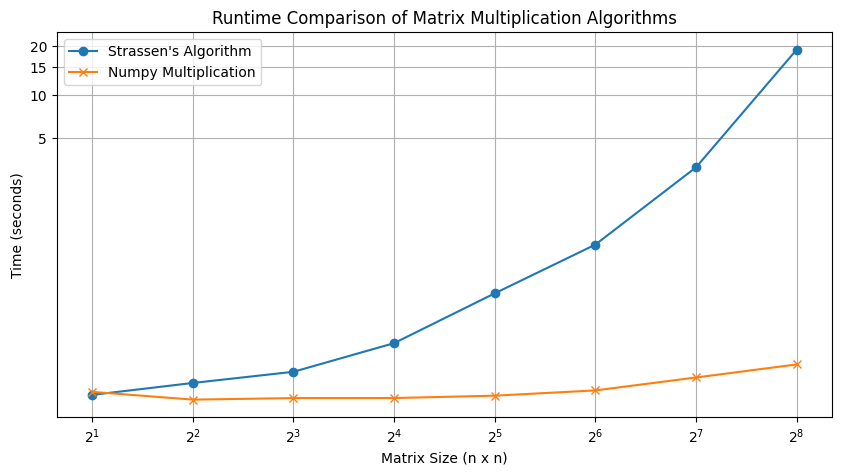

In [8]:
# Now, let's plot and check the results
plt.figure(figsize=(10, 5))
plt.plot(sizes, strassen_times, label="Strassen's Algorithm", marker='o')
plt.plot(sizes, numpy_times, label='Numpy Multiplication', marker='x')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Runtime Comparison of Matrix Multiplication Algorithms')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log')
ax = plt.gca()
deg = 5
ax.set_yscale(
    'function',
    functions=(
        lambda x: np.power(x, 1/deg),
        lambda x: np.power(x, deg)
    )
)
plt.grid(True)
plt.show()

**Interpretation:** For small matrix sizes (2 x 2), Strassen's algorithm performs better than NumPy's matrix multiplication. However, as the matrix size increases, the time taken by Strassen's algorithm increases sharply. This is because of the fact that Strassen's algorithm has a higher computational complexity $(O(n^{log_2 7}))$. Therefore, we can say that for matrix sizes beyond (64 x 64), NumPy's matrix multiplication is faster than Strassen's algorithm.

*Note to the Prof: I used Stackoverflow and ChatGPT to understand and improve some parts of the code chunks in Question 3, 4 and 5.*